In [1]:
import numpy as np # lineer işlemler
import pandas as pd # Veri işleme

# Visiualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Tools
# Önişleme
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Model Seçimi
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Makine öğrenmesi modelleri
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Metrikler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Sistem kütüphaneleri
import os
os.chdir(r"C:\Users\Excalibur\Desktop\VERİ BİLİMİ\KAGGLE\dataset")

In [2]:
import warnings
#Sonuçların okunmasını zorlaştırdığı için uyarıları kapatıyoruz.
warnings.filterwarnings("ignore") # görmezden gel
print("Uyarılar Kapatıldı")

Uyarılar Kapatıldı


### Veri Seti Hakkında Bağlamsal Değerlendirme

Bu veri seti, Hindistan'ın Andhra Pradesh kentinin Kuzeydoğusundan toplanan 416 karaciğer hastası ve 167 karaciğer dışı hasta kaydını içermektedir. "Dataset" sütunu, grupları karaciğer hastası veya olmayan (hastalıksız) ayıran sınıflar içerir. Bu veri seti 441 erkek hasta kaydı ve 142 kadın hasta kaydını içermektedir.

Yaşları 89'u aşan herhangi bir hasta yaşı "90" olarak belirlenmiştir.

Sütunlar:

* Hastanın yaşı
* Hastanın Cinsiyeti
* Toplam Bilirubin
* Doğrudan bilirubin
* Alkali Fosfotaz
* Alamin Aminotransferaz
* Aspartat Aminotransferaz
* Toplam Protiens
* Albümin
* Albumin ve Globulin Oranı
* Veri kümesi(Hedef değişken): alanı iki kümeye ayırmak için kullanılan alan (karaciğer hastalığı olan ya da hastalığı olmayan)

In [3]:
df = pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


> Yukarıdaki değerler de özelliklerin değer aralıklarının birbirinden çok farklı olduğu görünüyor olması, **normalleştirme** işleminin yapılması gerekitiğini gösteriyor.

> Yukarıdaki tabloda özelliklerden "Albumin_and_Globulin_Ratio" 579 ve diğer tümünün 583 örneğe sahip olduğu görülüyor.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Veri Seti Hakkında Teknik Değerlendirme
Yukarıdaki bilgileri inceleyerek veri seti hakkında şunları söyleyebiliriz:

* Veri seti 583 örnekten oluşmaktadır
* Her bir örnek 10('Dataset' özelliği sınıf etiketini belirtmektedir) özellikten oluşmaktadır
* Eksik veri, sadece 'Albumin_and_Globulin_Ratio' özelliğinde vardır. Özelliğe ati 583 özellikten 4(583-579=4) tanesi eksiktir
* 'Gender' özelliği hariç tüm özellikler sayısal değer içerir. Kategorik değer içerdiği için sayısal değerlerle temsil edilmesi gerekir. Kategorik değerleri ordinal(sıralı ör; small, medium, large) ve nominal olabilmektedir. 'Gender'' özelliği nominal bir kategorik değişken olduğu için OneHot Encoding yöntemiyle sayısal değere dönüştürülmesi gerekir.

### Veri Seti Üzerinde Önişlemler

In [6]:
# 'Albumin_and_Globulin_Ratio' eksik verileri ortalaması ile dolduralım.
df["Albumin_and_Globulin_Ratio"].fillna(df["Albumin_and_Globulin_Ratio"].mean(), inplace=True)
df.info() # eksik verileri kontrol edelim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Veri Setinin Grafiklerle İncelenmesi

Veri setindeki özellikleri ve hedef sınıfı grafiklerle incelemek faydalı olacaktır. İncelemeye geçmeden önce, 'Dataset' özellik sütunun adını target olarak değiştirelim; Dataset->target

In [7]:
df.rename(columns={"Dataset":"target"}, inplace=True)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


#### Hangi Grafiği Kullanmalıyım?
Sayısal değerler iki farlı nitelikte olabilir; sürekli ve ayrık değişkenler. Veri setini görselleştirmek için kullanılacak grafikler, veri setindeki özelliklerin tutuğu değişken niteliğini dikkate alarak seçilir.

**Sürekli değişken:** Sonsuz sayıda olası değere sahip bir değişkendir. Başka bir deyişle, değişken için herhangi bir değer mümkündür.

**Ayrık değişken:** Yalnızca belirli bir sayıda değer alabilen bir değişkendir. Başka bir deyişle, sonsuz sayıda değere sahip değildir.

İstatistiksel analiz, bir veri kümesindeki değişkenlerin birbiriyle nasıl ilişkilendiğini ve bu ilişkilerin diğer değişkenlere nasıl bağlı olduğunu anlama sürecidir. Değişkenlerin ayrık veya sürekli yapısı, istatiksel analizin temel bir bileşeni olan görseleştirme yapılırken dikkat edilmesi gerekir. Çünkü, veriler doğru bir şekilde görselleştirildiğinde, insanların bir ilişkiyi gösteren eğilimleri ve modelleri fark edebilmesini sağlar.

Veri setini görselleştirmek istediğimizde karşımıza çıkacak ihtimaller şunlardır:

* Sürekli iki değişken arasındaki ilişki (Bivariate Distribution )
* Ayrık iki değişken arasındaki ilişki (Bivariate Distribution)
* Sürekli-Ayrık iki değişken arasındaki ilişki (Bivariate Distribution)
* Tek bir sürekli değişkenin dağılımı (Univariate Distribution)
* Tek bir ayrık değişkenin dağılımı (Univariate Distribution)
* İkinde fazla değişken arasındaki ilişki (Multivariate Distribution)

#### Sınıf Dağılımları
'target', veri setindeki özellik vektörlerinin sınıf etiketlerini içerir. Toplamda iki sınıf vardır; '1' ve '2'. Değer 1, hastanın karaciğer hastalığı olduğunu ve '2' hastanın karaciğer hastalığı olmadığını gösterir. Veri setinde toplamda iki sınıf olduğu için, yapılacak sınıflandırma işlemi, İkili Sınıflandırma(Binary Classification) olarak adlandırılır. Sınıf sayısı ikiden fazla olsaydı sınıflandırma işlemi, Çoklu Sınıf Sınıflandırm(Multiclass Classification) olarak adlandırılacaktı.

Veri setindeki sınıf dağılımını ve cinsiyet dağılımını inceleyelim.

Ayrık değerlerin veri setidenki dağılımını göstermek için **countplot()** kullanışlıdır. Hangi değerden ne kadar olduğunu dikdörtgen çubuklarla gösterir. Ayrıca iki ayrık değişkenin veri setindeki dağılımını beraber göstermek içinde kullanışlıdır.

Karaciğer hastası sayısı:416, 
Karaciğer hastası olmayanların sayısı:167


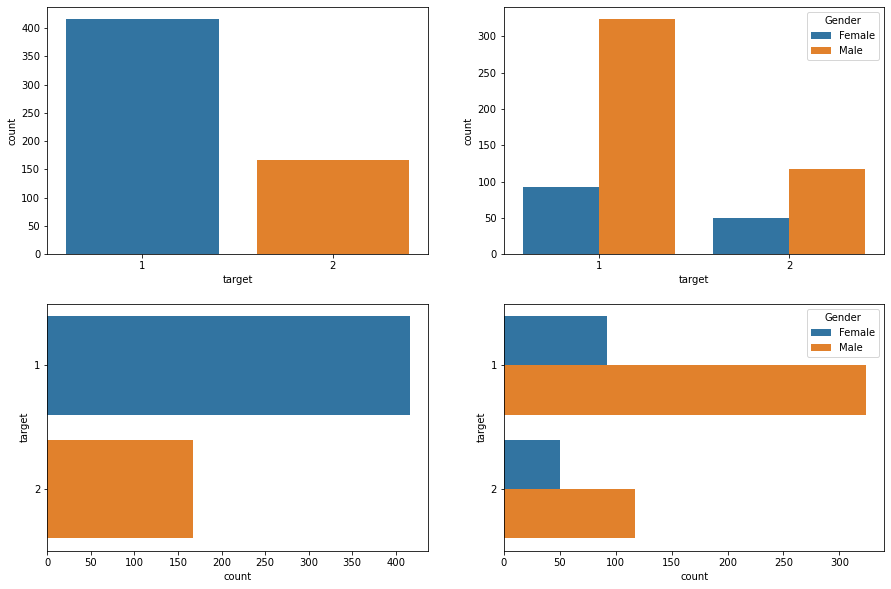

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.countplot(x="target", data=df, ax = axes[0,0])
sns.countplot(x="target", hue="Gender", data=df, ax = axes[0,1])
sns.countplot(y="target", data=df, ax = axes[1,0])
sns.countplot(y="target", hue="Gender", data=df, ax=axes[1,1])

liver_patients, not_liver_patients = df["target"].value_counts()

print("Karaciğer hastası sayısı:{}, \nKaraciğer hastası olmayanların sayısı:{}".format(liver_patients, not_liver_patients))

Yukarıda dört grafik yer almaktadır:

* Sol üstteki grafikte, target değişkenin veri setindeki dağılımını göstermektedir.
* Sağ üstteki grafikte, target değişkenin veri setindeki dağılımını iki ayrı kategori vermektedir.
* Sol alttaki grafikte, sol üstteki grafiğin yatay görünümü yer almaktadır
* Sağ alttaki grafikte, sağ üstteki grafiğin yatay görünümü yer almaktadır.

#### Cinsiyet Teşhisi ve Yüzdeleri
countplot() kategorik değerlerin dağılımını özetlemede başarılı olsada, kategorik değerlerin yüzdelik dilimi hakkında açıklayıcı değildir. **Pie chart** yüzdelik dilimleri göstermede daha başarılıdır. Seaborn kütüphanesinde pie chart olmadığı için pandas kütüphanesinde yer alan pie çizim fonksiyonu kullanılacaktır.

Text(0.5, 1.0, 'Hastaların Cinsiyet Yüzdeleri')

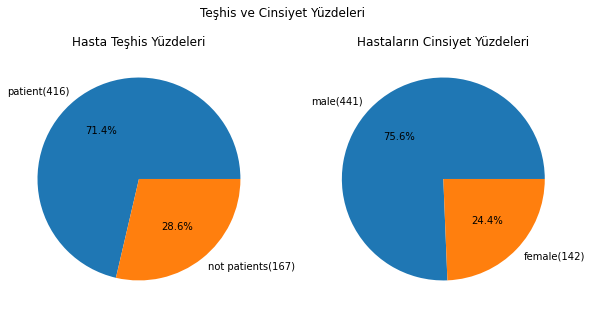

In [14]:
target_counts = df.target.value_counts().values
gender_counts = df.Gender.value_counts().values

fig1, ax = plt.subplots(1,2, figsize=(10,5))
fig1.suptitle("Teşhis ve Cinsiyet Yüzdeleri")


target_sizes = df.groupby("target").size() # size(): nesnedeki öğelerin sayısını temsil eden bir int döndürür.
ax[0].pie(x=target_counts, 
          labels = ["patient({})".format(target_sizes[1]), 
                    "not patients({})".format(target_sizes[2])], 
          autopct ="%1.1f%%")
ax[0].set_title("Hasta Teşhis Yüzdeleri")



gender_sizes = df.groupby("Gender").size()
ax[1].pie(x=gender_counts,
            labels=['male({})'.format(gender_sizes['Male']), 
                    'female({})'.format(gender_sizes['Female'])], 
            autopct="%1.1f%%")
ax[1].set_title("Hastaların Cinsiyet Yüzdeleri")